## Importing Required Libraries:

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading the Dataset:

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('item.csv')

df.head(8)

,id,title,brand,rating,rating_count,pricing,shipping,Image_URL,item_features
0,14-932-580,GIGABYTE GeForce RTX 4070 Ti GAMING OC 12G Gra...,GIGABYTE,4.9,59.0,859.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"[('Core Clock:', '2640 MHz'), ('Max Resolution..."
1,14-932-561,GIGABYTE Gaming GeForce RTX 4080 16GB GDDR6X P...,GIGABYTE,4.3,109.0,"1,183.87",Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"[('Max Resolution:', '7680 x 4320'), ('Display..."
2,9SIB86XH2K2757,51Risc AMD Radeon RX 580 DirectX 12 RX580 8G 2...,51Risc,4.6,18.0,85,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"[('Core Clock:', '1149 MHz'), ('Max Resolution..."
3,14-932-562,GIGABYTE EAGLE OC GeForce RTX 4080 16GB GDDR6X...,GIGABYTE,4.0,41.0,"1,149.99",Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"[('Max Resolution:', '7680 x 4320'), ('Display..."
4,14-137-632,MSI Ventus GeForce RTX 3060 12GB GDDR6 PCI Exp...,MSI,4.8,377.0,289.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"[('Max Resolution:', '7680 x 4320'), ('Display..."
5,9SIAZUEJM11138,Yeston GeForce RTX 4080 16GB GDDR6X PCI Expres...,yeston,5.0,3.0,"1,199.00",Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"[('Core Clock:', '2205MHz'), ('Max Resolution:..."
6,14-930-049,ASRock Radeon RX 6800 XT Phantom Gaming Graphi...,ASRock,4.6,163.0,509.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"[('Core Clock:', '1875 MHz'), ('Max Resolution..."
7,14-932-611,GIGABYTE WINDFORCE GeForce RTX 4070 12GB GDDR6...,GIGABYTE,4.7,38.0,599.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"[('Max Resolution:', '7680 x 4320'), ('Display..."


In [3]:
# Replace commas with an empty string in the 'pricing' column
df['pricing'] = df['pricing'].replace(',', '', regex=True)

# Convert the values in the 'pricing' column to float
df['pricing'] = df['pricing'].astype(float)
df['pricing']

0        859.99
1       1183.87
2         85.00
3       1149.99
4        289.99
         ...   
3598      61.00
3599     329.99
3600     250.00
3601      99.00
3602      62.60
Name: pricing, Length: 3603, dtype: float64

## Handling Null and Duplicate Values:

In [4]:
df['id'].duplicated().sum()

614

In [5]:
print("Before deleting the rows ",df.shape[0])

Before deleting the rows  3603


> Due to the process of gathering information and inserting it into a MySQL database, it becomes necessary to eliminate any duplicate IDs present in the ID column.

In [6]:
# Drop duplicates based on the 'id' column
df.drop_duplicates(subset='id', inplace=True)

In [7]:
print("After deleting the rows ",df.shape[0])

After deleting the rows  2989


In [8]:
df.duplicated().sum()

0

### Checking missing values

In [9]:
#sorting the missing values in rows in descending order

df.isnull().sum(axis=1).sort_values(ascending=False)

2770    5
2007    3
3408    3
2342    3
2726    3
       ..
2133    0
861     0
2131    0
2130    0
0       0
Length: 2989, dtype: int64

In [10]:
df.isnull().sum()

id                  1
title               0
brand              95
rating           1286
rating_count     1286
pricing           100
shipping            1
Image_URL           0
item_features       0
dtype: int64

- Brand column we impute missing data by mode method because this is the categorical column

In [11]:
df['brand']=df['brand'].fillna(df['brand'].mode()[0])

- Due to the presence of outliers in the data, we choose to use the median method for imputing the missing values in the "pricing" column. The median is less influenced by outliers compared to other measures of central tendency, making it a suitable choice in such cases.

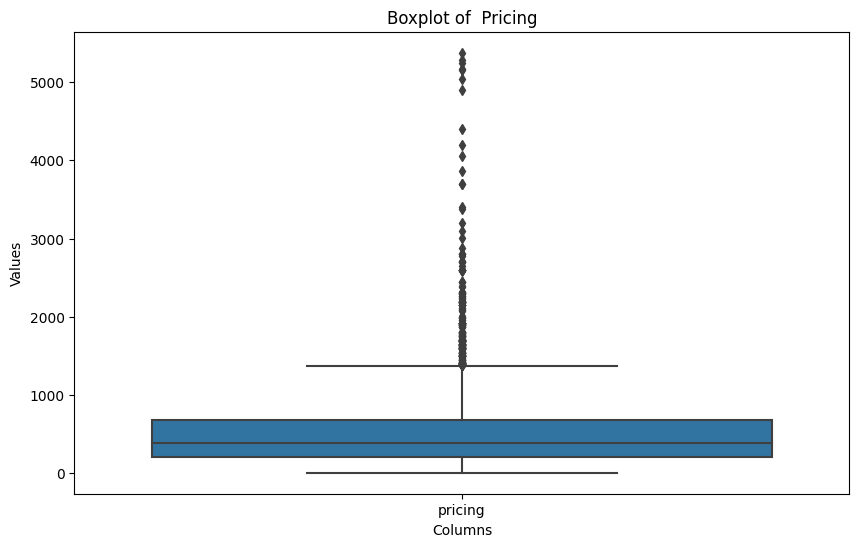

In [12]:

# Create a new dataframe with the desired columns
selected_columns = ['pricing']
selected_df = df[selected_columns]

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_df)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of  Pricing')
plt.show()


In [13]:
median_value = df['pricing'].median()
df['pricing'].fillna(median_value, inplace=True)


In [14]:
df.isnull().sum()

id                  1
title               0
brand               0
rating           1286
rating_count     1286
pricing             0
shipping            1
Image_URL           0
item_features       0
dtype: int64

- We assign a value of 0 to the null values in the "rating" and "rating_count" columns because those specific products either have not been sold or have not received any reviews yet.

In [15]:
df['rating'].fillna(0, inplace=True)
df['rating_count'].fillna(0, inplace=True)

- We also assign shipping column Free Shipping (mode method)

In [16]:
df['shipping'].value_counts()

Free Shipping       2255
$49.99 Shipping      416
$45.00 Shipping       47
Special Shipping      39
$10.00 Shipping       29
                    ... 
$10.99 Shipping        1
$0.05 Shipping         1
$52.83 Shipping        1
$21.00 Shipping        1
$54.00 Shipping        1
Name: shipping, Length: 63, dtype: int64

In [17]:
df['shipping']=df['shipping'].fillna(df['shipping'].mode()[0])

In [18]:
df.isnull().sum()

id               1
title            0
brand            0
rating           0
rating_count     0
pricing          0
shipping         0
Image_URL        0
item_features    0
dtype: int64

> We need to eliminate the id column which has missing value

In [19]:
df.dropna(subset=['id'], inplace=True)


In [20]:
df.isnull().sum()

id               0
title            0
brand            0
rating           0
rating_count     0
pricing          0
shipping         0
Image_URL        0
item_features    0
dtype: int64

> No Null Values present in the Dataset

In [21]:
df.isnull().sum().sum()

0

> In order to create a new column called "total price," it is essential to convert the data types of the "pricing" and "shipping" columns to float.

In [22]:
# Define a lambda function to extract fees from shipping price column ("shipping" column)
def extract_fee(value):
    if isinstance(value, str):
        if value == "Standard Shipping" or value == "Free Shipping":
            return 0.0
        else:
            fee_str = value.split(' ')[0].replace('$', '')
            try:
                fee = float(fee_str)
                return fee
            except ValueError:
                return 0
    else:
        return 0

# Apply the lambda function to the 'shipping' column
df['fee'] = df['shipping'].apply(lambda x: extract_fee(x))


In [23]:
df['total price'] = df['pricing'] + df['fee']

In [24]:
df.shape

(2988, 11)

In [25]:
df.isnull().sum().sum()

0

In [26]:
df.to_csv('items.csv')

In [27]:
import json

item_features = df['item_features'].tolist()  
json_data = json.dumps(item_features)

with open('item_features.json', 'w') as file:
    file.write(json_data)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=afa8f652-1060-4860-abb5-9da0da1ae4ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>